In [109]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics         import roc_curve

# Plot settings
mpl.rcParams['legend.frameon' ] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize' ] = 18
mpl.rcParams['axes.labelsize' ] = 18
mpl.rcParams['lines.linewidth'] = 2.5

In [100]:
featureName = ['FA','VA','CA','RS','Ch','FS','TS','De','pH','Su','Al','Q']
mydata = pd.read_csv('WhiteWineQuality.csv', sep=";", names=featureName)
print( mydata.head(1))
mydata = mydata[1:]
mydata = mydata.astype(float)
print( '\n-----------------------------')
print( 'After removing the long names' )
print( '-----------------------------')
print( mydata.head(10) )

              FA                VA           CA              RS         Ch  \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   

                    FS                    TS       De  pH         Su       Al  \
0  free sulfur dioxide  total sulfur dioxide  density  pH  sulphates  alcohol   

         Q  
0  quality  

-----------------------------
After removing the long names
-----------------------------
     FA    VA    CA    RS     Ch    FS     TS      De    pH    Su    Al    Q
1   7.0  0.27  0.36  20.7  0.045  45.0  170.0  1.0010  3.00  0.45   8.8  6.0
2   6.3  0.30  0.34   1.6  0.049  14.0  132.0  0.9940  3.30  0.49   9.5  6.0
3   8.1  0.28  0.40   6.9  0.050  30.0   97.0  0.9951  3.26  0.44  10.1  6.0
4   7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   9.9  6.0
5   7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   9.9  6.0
6   8.1  0.28  0.40   6.9  0.050  30.0   97.0  0.9951  3.26  0.44  10.1  6.0
7   6.2  0.32  0.16   7.

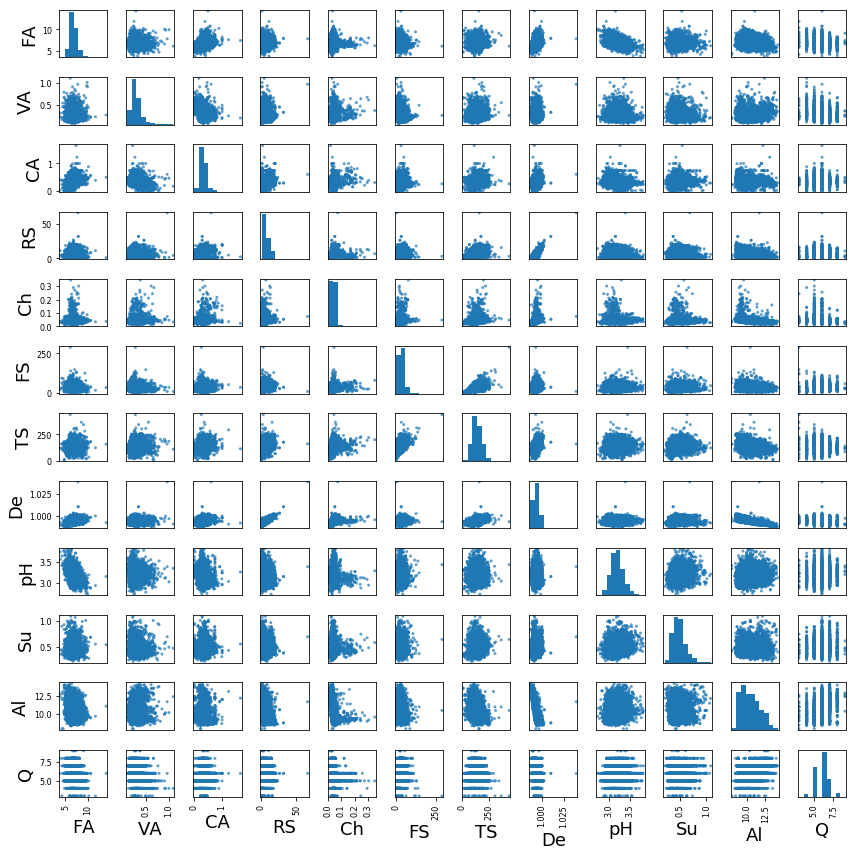

In [91]:
pd.plotting.scatter_matrix(mydata, figsize=(12,12), alpha=0.7, diagonal='hist')
plt.tight_layout()
plt.draw()

In [92]:
dataX = mydata.drop('Q',axis=1)
dataY = mydata['Q']

# cross validation samples preparing
trainX, testX, trainY, testY = train_test_split(dataX, dataY, random_state=42, train_size=0.5)

In [106]:
rf_regre1000 = RandomForestRegressor(n_estimators=1000).fit(trainX, trainY)
rf_regre100  = RandomForestRegressor(n_estimators=10 ).fit(trainX, trainY)

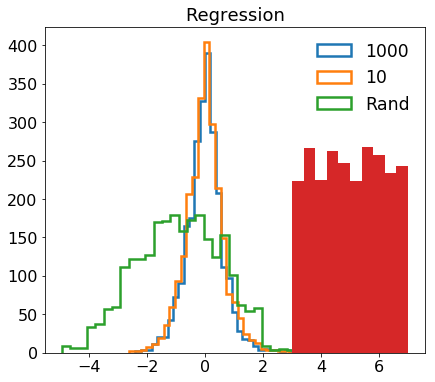

In [116]:
Ypred1000 = rf_regre1000.predict(testX)
Ypred100  = rf_regre100.predict(testX)
Yrand     = np.random.rand(len(testX))*4+3
Ytrue=np.array(testY,dtype='float')
 
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Regression')
plt.hist( Ypred1000-Ytrue  ,bins=30, histtype='step', linewidth=2.5, label='1000')
plt.hist( Ypred100 -Ytrue  ,bins=30, histtype='step', linewidth=2.5, label=  '10')
plt.hist( Yrand -Ytrue     ,bins=30, histtype='step', linewidth=2.5, label=  'Rand')
plt.legend()